## Step 1: Create tiny dataset
a 2D dataset with 8 datapoints

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
X = np.array(
    [
        [1, 2],
        [1.5, 1.8],
        [5, 8],
        [8, 8],
        [1, 0.6],
        [9, 11],
        [8, 2],
        [10, 2]
    ]
)

print(X.shape, "8 rows, 2 cols")

(8, 2) 8 rows, 2 cols


In [6]:
indices_datapoints = [chr(i) for i in range( ord('A'), ord('A') + X.shape[0] ) ]

datapoints_df = pd.DataFrame(X, columns = ["x1", "x2"], index=indices_datapoints)
datapoints_df.head(8)

,x1,x2
A,1.0,2.0
B,1.5,1.8
C,5.0,8.0
D,8.0,8.0
E,1.0,0.6
F,9.0,11.0
G,8.0,2.0
H,10.0,2.0


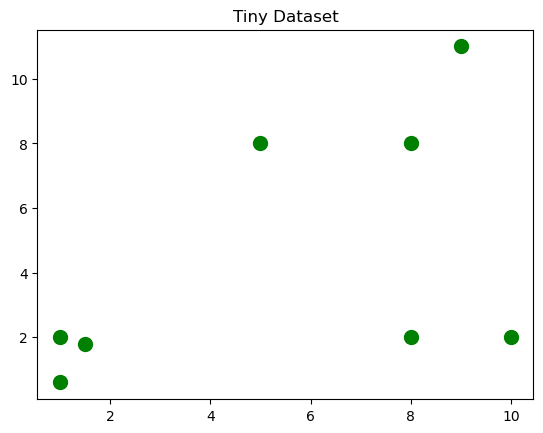

In [7]:
# visualize the datapoints
plt.scatter(X[:, 0], X[:, 1],s=100, c='green')
plt.title("Tiny Dataset")
plt.show()

## Step 2: Initialize cluster centroids
Let's choose k = 2 \
we'll randomly pick 2 points from the dataset to start as centroids

In [25]:
# choose k
k = int(input("Enter no. of cluster (k) : "))

Enter no. of cluster (k) :  3


In [26]:
# choose k
# k = 2

# randomly pick 2 points as initial centroids
np.random.seed(42)  # for reproducibility
centroids = X[np.random.choice(X.shape[0], k, replace=False) ]
"""
here,
    X.shape[0] : returns no. of rows in X (=8), i.e the total no. of datapoints
    k = 2 : select two unique indices
    replace = False : ensures no duplicates - each centroid is differenet data point

    so np.random.choice picks two values between [0, 7] as indices
    and X[index1, index2] will return an np-array of those 2 datapoints as shown
    in the code below
"""
print("Initial Centroids : ")
print(centroids)

centroids_df = pd.DataFrame(centroids, columns = ['x1', 'x2'])
centroids_df.head()

Initial Centroids : 
[[ 1.5  1.8]
 [ 9.  11. ]
 [ 1.   2. ]]


,x1,x2
0,1.5,1.8
1,9.0,11.0
2,1.0,2.0


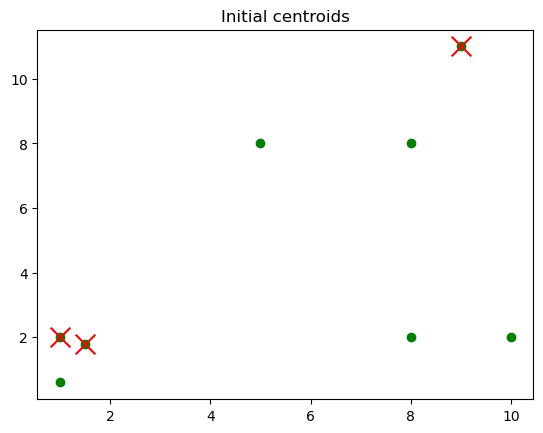

In [27]:
# let's visualize the centroids
plt.scatter(X[:, 0], X[:, 1], c='green')  # datapoints
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200)  # centroids
plt.title("Initial centroids")
plt.show()

## Step 4: Calculate the distance of points from centroids
check for each point whether it is closer to C1 or C2

In [11]:
from scipy.spatial.distance import cdist

In [12]:
def calculate_euclidean_dist(local_datapoints, local_centroids):
    distances = cdist(local_datapoints, local_centroids)  # compute euclidean dist by default
    return distances

## Step 5 : Assigning Cluster to datapoints
datapoints will be assigned to the cluster with nearer centroid

In [13]:
def assign_cluster(distances):
    # return 1 D array where each element is the index of the nearest centroid for the datapoint
    labels = np.argmin(distances, axis = 1)
    return labels

In [14]:
def visualize_cluster(local_centroids, labels, iteration):
    for i in range(k):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], label = f"Cluster-{i}")

    plt.scatter(local_centroids[:, 0], local_centroids[:, 1], marker='x', c='red', s=200)
    plt.legend()
    plt.title(f"Iteration -{iteration}: Assignment of Cluster")
    plt.show()

## Step 6: Update centroids
now take the mean of the points in each cluster to get new centroids

In [15]:
def update_centroids(labels):
    new_centroids = []
    
    for i in range(k):
        # print(f"Cluster - {i}")
        arr = X[labels == i]
        # print(arr)
    
        cluster_mean = arr.mean(axis = 0)
        # print(f"Mean = {cluster_mean}")
    
        new_centroids.append(cluster_mean)
        # print()

    new_centroids = np.array(new_centroids)
    return new_centroids

## Step 7 : Calculate WCSS (Within Cluster Sum of Squares)

In [16]:
def calculate_wcss(distances, centroids):
    wcss = 0
    for i in range(distances.shape[1]):
        wcss += np.sum(distances[:, i]**2)

    return wcss


<h1><center>Final Function</center></h1>

In [17]:
# import plotly.graph_objects as go

In [28]:
def kmeans_loop(total_iterations, centroids):

    wcss_values = []

    for iteration in range(total_iterations):
        # print the present centroids
        print(centroids)
        
        # Calculate the distance of points from centroids
        distances = calculate_euclidean_dist(X, centroids)
    
        # assign clusters to datapoints
        labels = assign_cluster(distances)
    
        # calculate wcss
        wcss = calculate_wcss(distances, centroids)
        print("WCSS = ", wcss)
        wcss_values.append(wcss)
        
        # visualize the cluster
        visualize_cluster(centroids,labels,  iteration)

    
        # update the centroids
        centroids = update_centroids(labels)

    # elbow point graph
    plt.plot(range(total_iterations), wcss_values, c='red', marker='o')
    plt.title("Elbow point")
    plt.xlabel("Iteration -->")
    plt.ylabel("WCSS -->")
    plt.grid(linestyle='--', alpha = 0.7)
    plt.show()


    # elbow point : change in wcss vs iterations
    change_in_wcss= []
    prev = wcss_values[0]
    print("Prev = ", prev)
    for i in range(len(wcss_values)):
        change = abs(wcss_values[i] - prev)
        print("Change = ", change)
        change_in_wcss.append(change)
        prev = wcss_values[i]

    print(wcss_values)
    print(change_in_wcss)
    
    plt.plot(range(total_iterations), change_in_wcss, c='blue', marker='o')
    plt.title("Elbow point (Change in wcss vs iter)")
    plt.xlabel("Iteration")
    plt.ylabel("Change in WCSS")
    plt.grid(linestyle='--', alpha = 0.7)
    plt.show()

[[ 1.5  1.8]
 [ 9.  11. ]
 [ 1.   2. ]]
WCSS =  1460.13


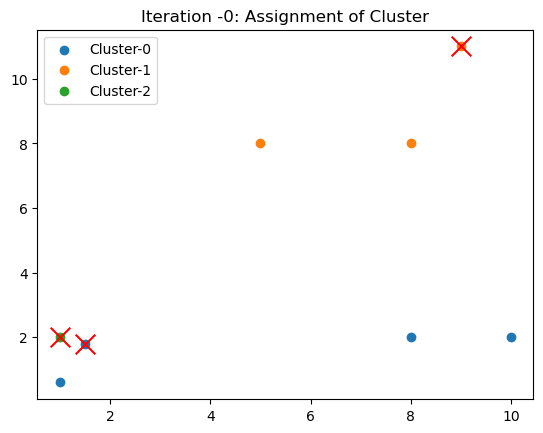

[[5.125      1.6       ]
 [7.33333333 9.        ]
 [1.         2.        ]]
WCSS =  1094.4222222222224


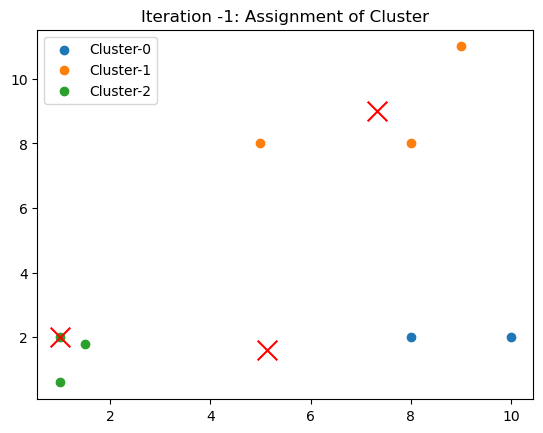

[[9.         2.        ]
 [7.33333333 9.        ]
 [1.16666667 1.46666667]]
WCSS =  1189.73


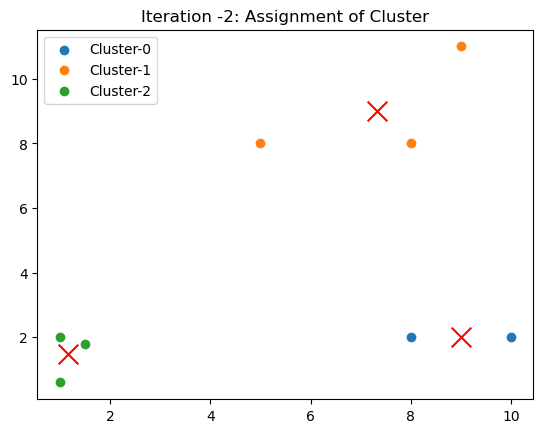

[[9.         2.        ]
 [7.33333333 9.        ]
 [1.16666667 1.46666667]]
WCSS =  1189.73


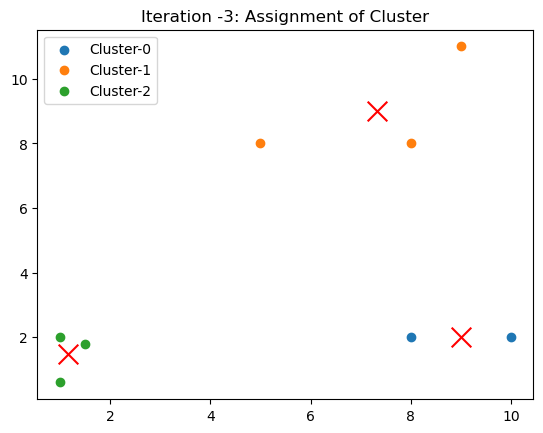

[[9.         2.        ]
 [7.33333333 9.        ]
 [1.16666667 1.46666667]]
WCSS =  1189.73


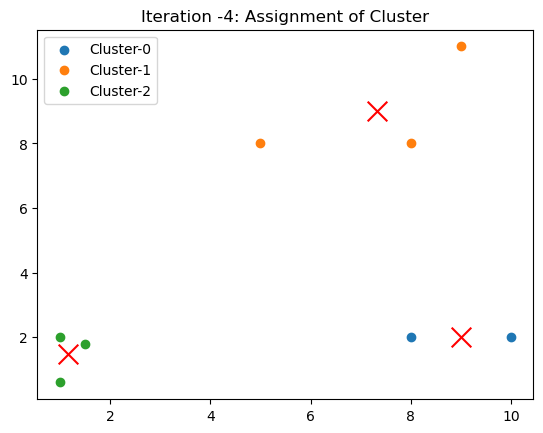

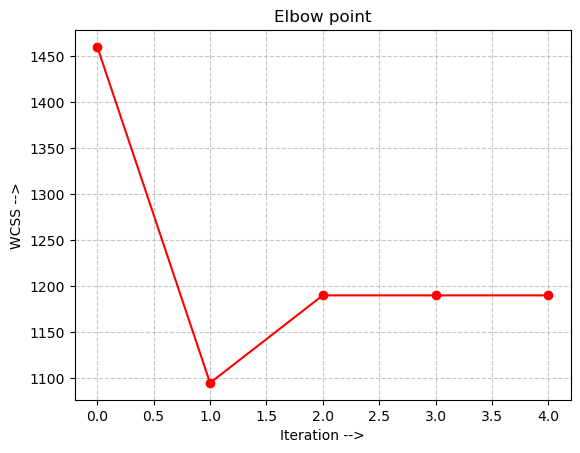

Prev =  1460.13
Change =  0.0
Change =  365.70777777777766
Change =  95.30777777777757
Change =  0.0
Change =  0.0
[1460.13, 1094.4222222222224, 1189.73, 1189.73, 1189.73]
[0.0, 365.70777777777766, 95.30777777777757, 0.0, 0.0]


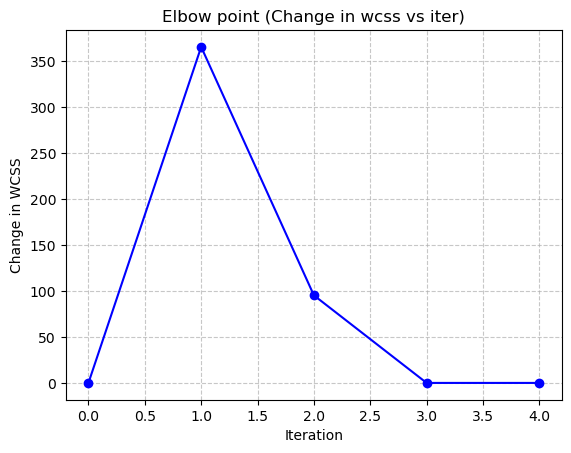

In [29]:
kmeans_loop(5, centroids)